In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ex1data1.txt', delimiter=',' ,header=0)


In [4]:
X,Y = df['X'], df['Y']
print X.shape, Y.shape
print df.head()

(97L,) (97L,)
        X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


In [5]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

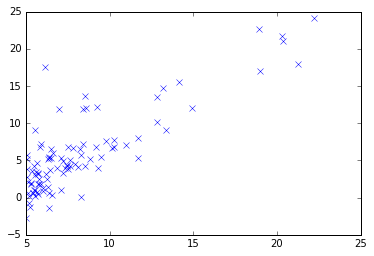

In [6]:
plt.plot(X,Y, 'x')
plt.show

In [7]:
import numpy as np

In [8]:
X = np.c_[np.ones((X.shape[0],1)),X]
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
print X.shape, theta.shape

(97L, 2L) (2L, 1L)


In [12]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [13]:
print computeCost(X,Y)

Exception: Data must be 1-dimensional

In [12]:
from sklearn import linear_model

In [13]:
regr = linear_model.SGDRegressor(alpha=alpha, n_iter=iterations)
print regr

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1500, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)


In [14]:
print X

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
5      8.3829
6      7.4764
7      8.5781
8      6.4862
9      5.0546
10     5.7107
11    14.1640
12     5.7340
13     8.4084
14     5.6407
15     5.3794
16     6.3654
17     5.1301
18     6.4296
19     7.0708
20     6.1891
21    20.2700
22     5.4901
23     6.3261
24     5.5649
25    18.9450
26    12.8280
27    10.9570
28    13.1760
29    22.2030
       ...   
67    10.2360
68     5.4994
69    20.3410
70    10.1360
71     7.3345
72     6.0062
73     7.2259
74     5.0269
75     6.5479
76     7.5386
77     5.0365
78    10.2740
79     5.1077
80     5.7292
81     5.1884
82     6.3557
83     9.7687
84     6.5159
85     8.5172
86     9.1802
87     6.0020
88     5.5204
89     5.0594
90     5.7077
91     7.6366
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: X, dtype: float64


In [15]:
print Y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
5     11.88600
6      4.34830
7     12.00000
8      6.59870
9      3.81660
10     3.25220
11    15.50500
12     3.15510
13     7.22580
14     0.71618
15     3.51290
16     5.30480
17     0.56077
18     3.65180
19     5.38930
20     3.13860
21    21.76700
22     4.26300
23     5.18750
24     3.08250
25    22.63800
26    13.50100
27     7.04670
28    14.69200
29    24.14700
        ...   
67     7.77540
68     1.01730
69    20.99200
70     6.67990
71     4.02590
72     1.27840
73     3.34110
74    -2.68070
75     0.29678
76     3.88450
77     5.70140
78     6.75260
79     2.05760
80     0.47953
81     0.20421
82     0.67861
83     7.54350
84     5.34360
85     4.24150
86     6.79810
87     0.92695
88     0.15200
89     2.82140
90     1.84510
91     4.29590
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Y, dtype: float64


In [16]:
X = np.array(X)
X = X.reshape(-1,1)
Y = np.array(Y)
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=0.4, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(58L, 1L) (39L, 1L) (58L,) (39L,)


In [17]:
regr.fit(X,Y)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1500, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [18]:
print regr.coef_
print regr.verbose

[ 1.22389109]
0


In [19]:
#RMSE
rmse = np.mean((regr.predict(X_test) - y_test) ** 2)
print rmse
print('Variance score: %.2f' % regr.score(X_test,y_test))


8.05376642535
Variance score: 0.58


[  3.57604719   2.86325302   6.52378888   4.66910433   3.26970725
   6.35770686   5.24824959   6.5966104    4.03635263   2.28423015
   3.08722509  13.43314365   3.11574175   6.38891609   3.00155271
   2.68174997   3.88850659   2.37663392   3.9670804    4.75183936
   3.67273459  20.90622265   2.81723472   3.84040767   2.90878177
  19.28456696  11.79802515   9.50812492  12.22393925  23.27200413
   2.5263158    4.16265819   7.41673982   3.30887177   6.14744237
   5.80756782   6.00645012   2.95945086  11.80781628   3.87381989
   2.71540698   4.52138067  10.42726713   3.16433023   5.67453086
   4.77913213   2.30332285   3.19823201  10.417476     2.88026511
   5.32633384   2.59399698   5.18399531   5.40331659   3.84860774
   3.8805513    3.77688772   3.00032882   7.49262107   7.66812705
   6.89927867   2.43684936  22.14112876  14.34371862  19.30170143
   4.93224091   6.25024923   8.62569944   2.8286169   20.99311892
   8.50331034   5.07457944   3.44888491   4.94166487   2.25032836
   4.11186

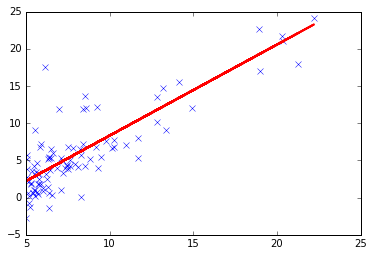

In [22]:
plt.plot(X, Y,'x')
plt.plot(X, regr.predict(X), color='red',
         linewidth=2)
print regr.predict(X)
plt.show()